In [1]:
from ailab_active_learning.AL import ActiveLearning

In [2]:
AL =ActiveLearning()

In [3]:
columns = ['Tin [K]', 'Pin [kPa]', 'N [rpm]', 'Total Consumed power', 'Pout [kPA]','Qin [m3/s]']
input_columns = ['Tin [K]', 'Pin [kPa]', 'N [rpm]', 'Total Consumed power', 'Diff_Pressure']
output_columns = ['Qin [m3/s]']
file_name='TestPoints_100k_NEW.xlsx'
no_of_samples=6000
_test_size: int = 1000

In [4]:
#my_data = AL._data_for_al(file_name='TestPoints_100k_NEW.xlsx',no_of_samples=6000)
my_data = AL._data_for_al(file_name=file_name,
                     no_of_samples=no_of_samples,
                     columns = columns,
                     input_columns = input_columns,
                     output_columns = output_columns,
                     _test_size = _test_size)

<class 'pandas.core.frame.DataFrame'>
['Tin [K]', 'Pin [kPa]', 'N [rpm]', 'Total Consumed power', 'Diff_Pressure']
['Qin [m3/s]']
(5000, 5) (1000, 5) (5000, 1) (1000, 1)
(5000, 5) (5000, 1) (1000, 5) (1000, 1)
(500, 5) (4500, 5) (500, 1) (4500, 1) (1000, 5) (1000, 1)


/usr/local/lib/python3.8/dist-packages/ailab_active_learning/AL.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diff_Pressure'] = data['Pout [kPA]'] - data['Pin [kPa]']


In [5]:
X_train_al,X_pool_al,X_test_al,y_test_al,y_train_al,y_pool_al = AL._data_for_al(file_name=file_name,
                                                                                no_of_samples=no_of_samples,
                                                                                columns = columns,
                                                                                input_columns = input_columns,
                                                                                output_columns = output_columns,
                                                                                _test_size = _test_size)

<class 'pandas.core.frame.DataFrame'>
['Tin [K]', 'Pin [kPa]', 'N [rpm]', 'Total Consumed power', 'Diff_Pressure']
['Qin [m3/s]']
(5000, 5) (1000, 5) (5000, 1) (1000, 1)
(5000, 5) (5000, 1) (1000, 5) (1000, 1)
(500, 5) (4500, 5) (500, 1) (4500, 1) (1000, 5) (1000, 1)


/usr/local/lib/python3.8/dist-packages/ailab_active_learning/AL.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diff_Pressure'] = data['Pout [kPA]'] - data['Pin [kPa]']


In [6]:
al_list = AL.fit_al(train_x=X_train_al,
               train_y=y_train_al,
               pool_x=X_pool_al,
               pool_y=y_pool_al,
               test_x=X_test_al,
               test_y=y_test_al)

21.00649642944336


In [7]:
train_x, test_x, train_y, test_y = AL._data_for_lr(file_name=file_name,
                     no_of_samples=no_of_samples,
                     columns = columns,
                     input_columns = input_columns,
                     output_columns = output_columns,
                     _test_size = _test_size)

/usr/local/lib/python3.8/dist-packages/ailab_active_learning/AL.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diff_Pressure'] = data['Pout [kPA]'] - data['Pin [kPa]']


In [8]:
test_mae_error_bl_list=AL.fit_lr(train_x, test_x, train_y, test_y)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.8/dist-packages/nump

In [9]:
test_mae_error_bl_list

[0.0094416698991735,
 0.009365001809513348,
 0.009333705837278427,
 0.009317414022488672,
 0.009320493191557323,
 0.00931172511022678,
 0.009309833360501696,
 0.009318868451713605,
 0.009316607325035371,
 0.00931996160559147]

<AxesSubplot:>

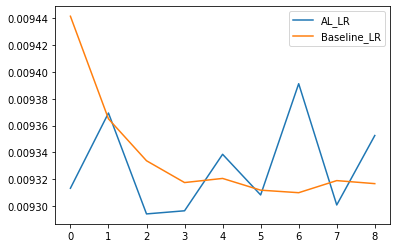

In [10]:
AL.compare_results(list_al=al_list,list_baseline=test_mae_error_bl_list)